In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import microhapdb
import numpy
import pandas
import seaborn

In [2]:
_m = microhapdb.markers.copy()
_m = _m[~pandas.isna(_m.AvgAe)]
f = pandas.read_csv('marker-fst.tsv', sep='\t')
m = _m.join(f.set_index('Marker'), on='Name')
m.head()

,Name,PermID,Reference,Chrom,Offsets,AvgAe,In,Source,Fst
0,mh01KK-172,MHDBM-d5a744a2,GRCh38,chr1,"1551453,1551522,1551678",2.9310,0.2160,ALFRED,-0.0441
1,mh01USC-1pA,MHDBM-b44cecf4,GRCh38,chr1,"1594569,1594598,1594613,1594617",3.8005,0.2029,10.1016/j.fsigen.2019.102213,0.0036
2,mh01KK-001,MHDBM-a9f4dcdb,GRCh38,chr1,"3826567,3826754,3826785,3826826",3.1421,0.2860,ALFRED,0.0713
3,mh01KK-106,MHDBM-af04b293,GRCh38,chr1,"4167403,4167500,4167563,4167573",2.6379,0.1962,ALFRED,0.1783
4,mh01KK-070,MHDBM-880ee42f,GRCh38,chr1,"11794399,11794418",1.9123,0.1409,ALFRED,0.1178


In [3]:
sources = m.Source.unique()
labels = {
    'ALFRED':                         'ALFRED (2018)',
    '10.1016/j.fsigen.2019.02.018':   'Chen (2019)',
    '10.1016/j.legalmed.2015.06.003': 'Hiroaki (2015)',
    '10.1016/j.fsigen.2019.102213':   'USC (2020)',
    'ISFG2019:P597':                  'ISFG P597 (2019)',
    '10.1016/j.fsigen.2018.05.008':   'van der Gaag (2018)',
    '10.1016/j.fsigen.2018.05.001':   'Voskoboinik (2018)'
}
colors = [
    '#9b59b6',
    '#3498db',
    '#95a5a6',
    '#e74c3c',
    '#34495e',
    '#2ecc71',
    '#feb308',
]

def plot_data(axis, xid, yid, xlabel, ylabel, xtop=False, yright=False, rcoords=(0, 0), subfiglabel=None, subfigcoords=(0, 0)):
    for color, src in zip(colors, sources):
        subset = m[m.Source == src]
        axis.scatter(subset[xid], subset[yid], color=color, marker='.', label=labels[src])

    axis.set_xlabel(xlabel)
    if xtop:
        axis.xaxis.tick_top()
        axis.xaxis.set_label_position('top')
    axis.set_ylabel(ylabel)
    if yright:
        axis.yaxis.tick_right()
        axis.yaxis.set_label_position('right')

    x, y = m[xid], m[yid]
    slope, intercept = numpy.polyfit(x, y, 1)
    axis.plot(x, slope*x + intercept, color='red', linestyle='-')
    r = numpy.corrcoef(x, y)
    axis.text(*rcoords, f'R = {r[0, 1]:.2f}', color='red')
    
    if subfiglabel:
        axis.text(*subfigcoords, subfiglabel, color='black', fontsize=16)

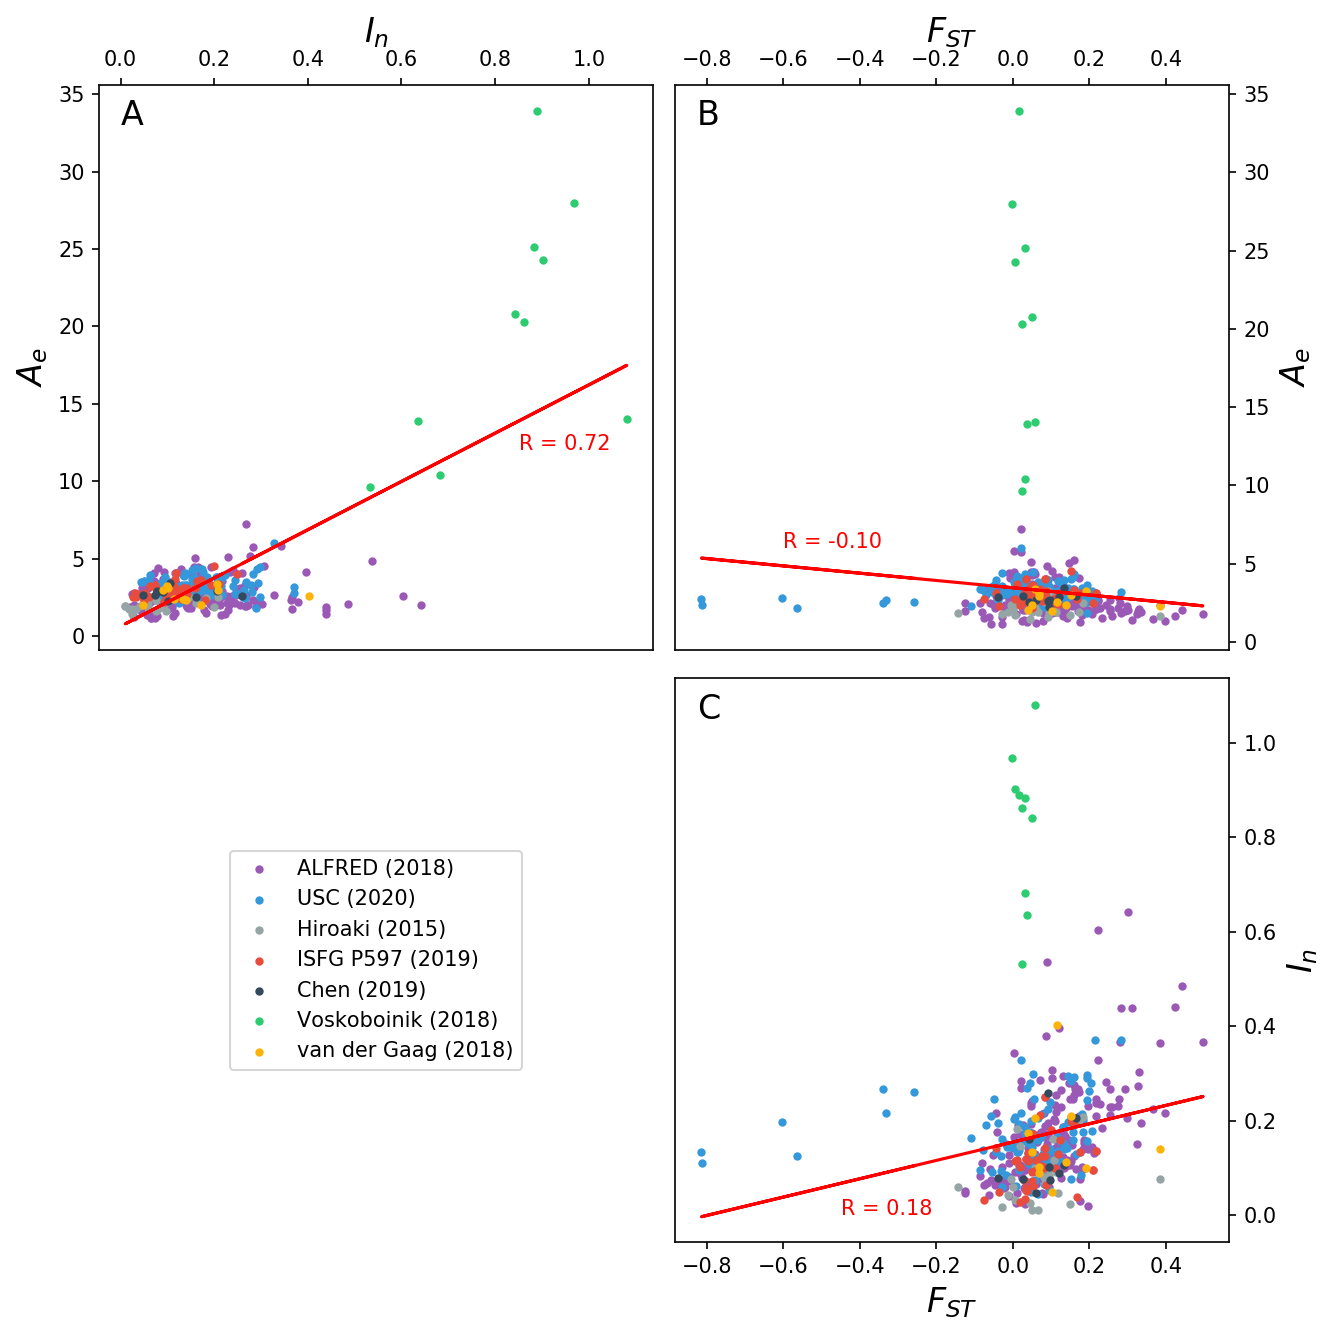

In [4]:
# Setup
matplotlib.rcParams['axes.labelsize'] = 16
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9), dpi=150, sharex='col', sharey='row')
fig.patch.set_facecolor('white')

# Top left
axis = plt.subplot(2, 2, 1)
plot_data(
    axis, 'In', 'AvgAe', '$I_n$', '$A_e$',
    xtop=True, rcoords=(0.85, 12), subfiglabel='A', subfigcoords=(0, 33)
)

# Top right
axis = plt.subplot(2, 2, 2)
plot_data(
    axis, 'Fst', 'AvgAe', '$F_{ST}$', '$A_e$',
    xtop=True, yright=True, rcoords=(-0.6, 6), subfiglabel='B', subfigcoords=(-0.825, 33)
)
prev = axis

# Bottom left
axis = plt.subplot(2, 2, 3)
axis.axis('off')
_ = axis.legend(*prev.get_legend_handles_labels(), loc='center')

# Bottom right
axis = plt.subplot(2, 2, 4)
plot_data(
    axis, 'Fst', 'In', '$F_{ST}$', '$I_n$',
    yright=True, rcoords=(-0.45, 0), subfiglabel='C', subfigcoords=(-0.825, 1.05)
)

# Cleanup
plt.tight_layout()
fig.savefig('microhaps-ae-in-fst.pdf')

In [5]:
m.to_csv('markers-with-fst.tsv', sep='\t', index=False)